In [20]:
import numpy as np

In [3]:
import pandas as pd
import dateutil

df_phone = pd.read_csv("./phone_data.csv")
df_phone['date'] = df_phone['date'].apply(dateutil.parser.parse, dayfirst=True) # data 형식을 바꿔준다. 문자 형태를 날짜 형태로 변환해준다
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [4]:
df_phone.dtypes

index                    int64
date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

In [5]:
df_phone.groupby('month')['duration'].sum() # 각 달마다 통화시간이 얼마나 되어있는지

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

<AxesSubplot:xlabel='month'>

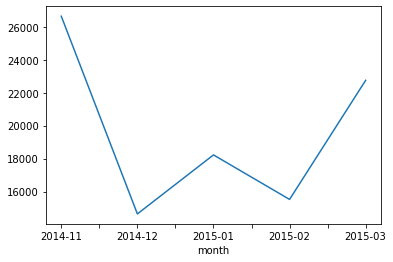

In [7]:
df_phone.groupby('month')['duration'].sum().plot()

<AxesSubplot:xlabel='month'>

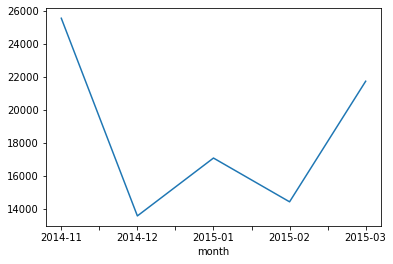

In [8]:
df_phone[df_phone['item'] == 'call'].groupby('month')['duration'].sum().plot()

<AxesSubplot:xlabel='month'>

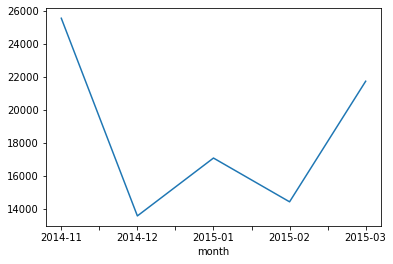

In [9]:
df_phone[df_phone['item'] == 'call'].groupby('month')["duration"].sum().plot()

<AxesSubplot:xlabel='month'>

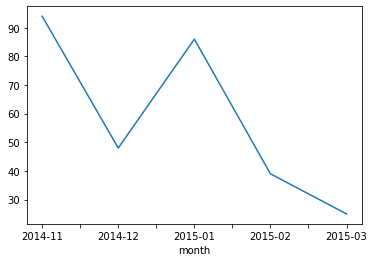

In [10]:
df_phone[df_phone['item'] == 'sms'].groupby('month')['duration'].sum().plot()

<AxesSubplot:xlabel='month'>

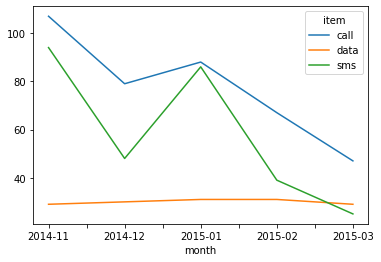

In [14]:
df_phone.groupby(['month', 'item'])['duration'].count().unstack().plot()

In [15]:
df_phone.groupby(['month', 'item'])['duration'].sum()

month    item
2014-11  call    25547.000
         data      998.441
         sms        94.000
2014-12  call    13561.000
         data     1032.870
         sms        48.000
2015-01  call    17070.000
         data     1067.299
         sms        86.000
2015-02  call    14416.000
         data     1067.299
         sms        39.000
2015-03  call    21727.000
         data      998.441
         sms        25.000
Name: duration, dtype: float64

In [16]:
df_phone.groupby('month', as_index=False).agg({'duration':'sum'}) # month를 인덱스로 하지 않고, duration의 sum을 적용시킨다

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [18]:
df_phone.groupby(['month', 'item']).agg(
    {
        'duration': sum,
        'network_type': 'count',
        'date': 'first',
    }
)

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

In [21]:
grouped = df_phone.groupby('month').agg({'duration': [min, max, np.mean]})
grouped

duration                     
             min      max        mean
month                                
2014-11      1.0   1940.0  115.823657
2014-12      1.0   2120.0   93.260318
2015-01      1.0   1859.0   88.894141
2015-02      1.0   1863.0  113.301453
2015-03      1.0  10528.0  225.251891

In [22]:
grouped.columns = grouped.columns.droplevel(level=0)
grouped

,min,max,mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


In [23]:
grouped.add_prefix('duration_') # 앞에 더해준다

,duration_min,duration_max,duration_mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


# Pivot table & Crosstab

In [25]:
df_phone = pd.read_csv('phone_data.csv')
df_phone['date'] = df_phone['date'].apply(dateutil.parser.parse, dayfirst=True)
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [26]:
df_phone.pivot_table(['duration'],
                    index=[df_phone.month, df_phone.item],
                    columns=df_phone.network, 
                    aggfunc='sum',
                    fill_value=0)  # NaN 값을 0으로 채워준다

duration                                                   \
network        Meteor Tesco  Three Vodafone      data landline special   
month   item                                                             
2014-11 call     1521  4045  12458     4316     0.000     2906       0   
        data        0     0      0        0   998.441        0       0   
        sms        10     3     25       55     0.000        0       1   
2014-12 call     2010  1819   6316     1302     0.000     1424       0   
        data        0     0      0        0  1032.870        0       0   
        sms        12     1     13       18     0.000        0       0   
2015-01 call     2207  2904   6445     3626     0.000     1603       0   
        data        0     0      0        0  1067.299        0       0   
        sms        10     3     33       40     0.000        0       0   
2015-02 call     1188  4087   6279     1864     0.000      730       0   
        data        0     0      0        0  1067.299        0       0   
        sms         1     2     11       23     0.000        0       2   
2015-03 call      274   973   4966     3513     0.000    11770       0   
        data        0     0      0        0   998.441        0       0   
        sms         0     4      5       13     0.000        0       0   

                              
network      voicemail world  
month   item                  
2014-11 call       301     0  
        data         0     0  
        sms          0     0  
2014-12 call       690     0  
        data         0     0  
        sms          0     4  
2015-01 call       285     0  
        data         0     0  
        sms          0     0  
2015-02 call       268     0  
        data         0     0  
        sms          0     0  
2015-03 call       231     0  
        data         0     0  
        sms          0     3

In [27]:
df_phone.groupby(['month', 'item', 'network'])['duration'].sum().unstack() # groupby를 이용해서 똑같이 할 수 있다

network       Meteor   Tesco    Three  Vodafone      data  landline  special  \
month   item                                                                   
2014-11 call  1521.0  4045.0  12458.0    4316.0       NaN    2906.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms     10.0     3.0     25.0      55.0       NaN       NaN      1.0   
2014-12 call  2010.0  1819.0   6316.0    1302.0       NaN    1424.0      NaN   
        data     NaN     NaN      NaN       NaN  1032.870       NaN      NaN   
        sms     12.0     1.0     13.0      18.0       NaN       NaN      NaN   
2015-01 call  2207.0  2904.0   6445.0    3626.0       NaN    1603.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms     10.0     3.0     33.0      40.0       NaN       NaN      NaN   
2015-02 call  1188.0  4087.0   6279.0    1864.0       NaN     730.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms      1.0     2.0     11.0      23.0       NaN       NaN      2.0   
2015-03 call   274.0   973.0   4966.0    3513.0       NaN   11770.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms      NaN     4.0      5.0      13.0       NaN       NaN      NaN   

network       voicemail  world  
month   item                    
2014-11 call      301.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2014-12 call      690.0    NaN  
        data        NaN    NaN  
        sms         NaN    4.0  
2015-01 call      285.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-02 call      268.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-03 call      231.0    NaN  
        data        NaN    NaN  
        sms         NaN    3.0

## crosstab

In [28]:
df_movie = pd.read_csv('movie_rating.csv')
df_movie

,critic,title,rating
0,Jack Matthews,Lady in the Water,3.0
1,Jack Matthews,Snakes on a Plane,4.0
2,Jack Matthews,You Me and Dupree,3.5
3,Jack Matthews,Superman Returns,5.0
4,Jack Matthews,The Night Listener,3.0
5,Mick LaSalle,Lady in the Water,3.0
6,Mick LaSalle,Snakes on a Plane,4.0
7,Mick LaSalle,Just My Luck,2.0
8,Mick LaSalle,Superman Returns,3.0
9,Mick LaSalle,You Me and Dupree,2.0


In [30]:
df_movie.pivot_table(
    values=['rating'],
    index=df_movie.critic,
    columns=df_movie.title,
    aggfunc='sum',
    fill_value=0,
)

rating                                      \
title         Just My Luck Lady in the Water Snakes on a Plane   
critic                                                           
Claudia Puig           3.0               0.0               3.5   
Gene Seymour           1.5               3.0               3.5   
Jack Matthews          0.0               3.0               4.0   
Lisa Rose              3.0               2.5               3.5   
Mick LaSalle           2.0               3.0               4.0   
Toby                   0.0               0.0               4.5   

                                                                     
title         Superman Returns The Night Listener You Me and Dupree  
critic                                                               
Claudia Puig               4.0                4.5               2.5  
Gene Seymour               5.0                3.0               3.5  
Jack Matthews              5.0                3.0               3.5  
Lisa Rose                  3.5                3.0               2.5  
Mick LaSalle               3.0                3.0               2.0  
Toby                       4.0                0.0               1.0

In [31]:
df_movie.groupby(['critic', 'title']).agg({'rating': 'first'}).unstack()

rating                                      \
title         Just My Luck Lady in the Water Snakes on a Plane   
critic                                                           
Claudia Puig           3.0               NaN               3.5   
Gene Seymour           1.5               3.0               3.5   
Jack Matthews          NaN               3.0               4.0   
Lisa Rose              3.0               2.5               3.5   
Mick LaSalle           2.0               3.0               4.0   
Toby                   NaN               NaN               4.5   

                                                                     
title         Superman Returns The Night Listener You Me and Dupree  
critic                                                               
Claudia Puig               4.0                4.5               2.5  
Gene Seymour               5.0                3.0               3.5  
Jack Matthews              5.0                3.0               3.5  
Lisa Rose                  3.5                3.0               2.5  
Mick LaSalle               3.0                3.0               2.0  
Toby                       4.0                NaN               1.0